In [35]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display

from sklearn.datasets import make_blobs

from sklearn import svm

## Линейный SVM

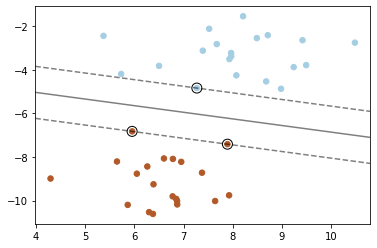

In [52]:
X, y = make_blobs(n_samples=40, centers=2, random_state=6)# 42


clf = svm.SVC(kernel='linear')
clf.fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)


ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()


xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)


ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])

ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k')
plt.show()

## Ядерный SVM

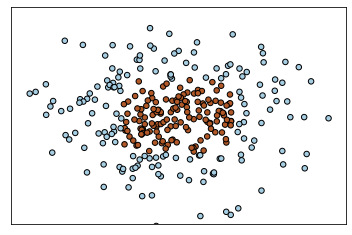

In [2]:
xx, yy = np.meshgrid(np.linspace(-3, 3, 500),
                     np.linspace(-3, 3, 500))
np.random.seed(0)
X = np.random.randn(300, 2)
y = np.logical_and(np.logical_and(X[:, 0]>-1, X[:, 0]<1), np.logical_and(X[:, 1] > -1,X[:, 1] < 1))


plt.scatter(X[:, 0], X[:, 1], s=30, c=y, cmap=plt.cm.Paired,
            edgecolors='k')
plt.xticks(())
plt.yticks(())
plt.axis([-3, 3, -3, 3])
plt.show()

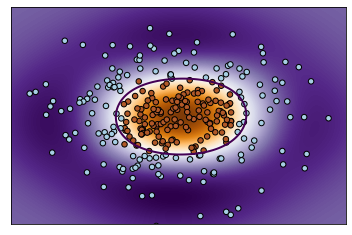

In [3]:
clf = svm.SVC(gamma='auto')
clf.fit(X, y)
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.imshow(Z, interpolation='spline16',
            extent=(xx.min(), xx.max(), yy.min(), yy.max()), aspect='auto',
            origin='lower', cmap=plt.cm.PuOr_r)
contours = plt.contour(xx, yy, Z, levels=[0], linewidths=2)
plt.scatter(X[:, 0], X[:, 1], s=30, c=y, cmap=plt.cm.Paired,
            edgecolors='k')
plt.xticks(())
plt.yticks(())
plt.axis([-3, 3, -3, 3])
plt.show()

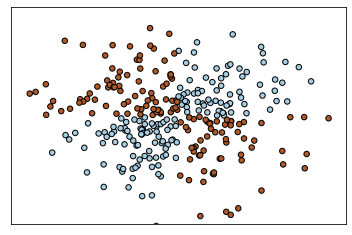

In [4]:
xx, yy = np.meshgrid(np.linspace(-4, 4, 500),
                     np.linspace(-3, 3, 500))
np.random.seed(0)
X = np.random.randn(300, 2)
y = np.logical_xor(X[:, 0] > 0, X[:, 1] > 0)


plt.scatter(X[:, 0], X[:, 1], s=30, c=y, cmap=plt.cm.Paired,
            edgecolors='k')
plt.xticks(())
plt.yticks(())
plt.axis([-3, 3, -3, 3])
plt.show()

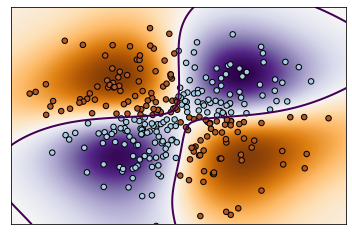

In [5]:
clf = svm.SVC(gamma='auto')
clf.fit(X, y)
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.imshow(Z, interpolation='spline16',
            extent=(xx.min(), xx.max(), yy.min(), yy.max()), aspect='auto',
            origin='lower', cmap=plt.cm.PuOr_r)
contours = plt.contour(xx, yy, Z, levels=[0], linewidths=2)
plt.scatter(X[:, 0], X[:, 1], s=30, c=y, cmap=plt.cm.Paired,
            edgecolors='k')
plt.xticks(())
plt.yticks(())
plt.axis([-3, 3, -3, 3])
plt.show()

## Настройка параметров SVM

1. Параметр <code>С</code> - помогает отрегулировать  грань между "гладкостью" и точностью классификации объектов обучающей выборки. Чем больше значение <code>С</code>, тем больше объектов обучающей выборки будут правильно классифицированы и тем менее "прямая" линяя будет делить классы.

2. Параментр <code>gamma</code> определяет насколько далеко каждый из элементов в наборе данных имеет влияние при определении "идеальной линии". </br>
Чем ниже гамма, тем больше элементов, даже тех, которые достаточно далеки от разделяющей линии, принимают участие в процессе выбора этой самой линии. </br>
Если же, гамма высокая, тогда алгоритм будет “опираться” только на тех элементах, которые наиболее близки к самой линии.</br>
Если задать уровень гаммы слишком высоким, тогда в процессе принятия решения о расположении линии будут учавствовать только самые близкие к линии элементы. Это поможет игнорировать выбросы в данных. 

При правильной настройке <code>С</code> и <code>gamma</code> можно добиться оптимального результата, который построит более линейную гиперплоскость игнорирующую выбросы, и следовательно, более генерализуемую.

<AxesSubplot:xlabel='param_classifier__gamma', ylabel='param_classifier__C'>

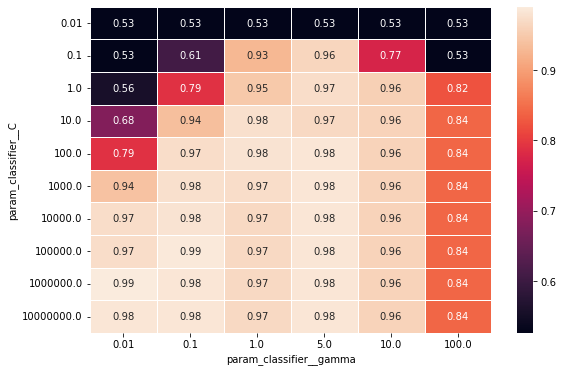

In [6]:
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, Normalizer
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold

pipe = Pipeline([('preprocessing', StandardScaler()), 
                 ('classifier', svm.SVC())])

C=np.array([0.01,0.1,1,10,100,10**3,10**4, 10**5,10**6,10**7])
gamma=[0.01,0.1,1,5,10,100]

param_grid =[
    {'preprocessing': [StandardScaler()], 
     'classifier': [svm.SVC()],
     'classifier__C': C,
     'classifier__gamma': gamma
     }
]

grid = GridSearchCV(pipe, param_grid, cv=5, return_train_score=True)
grid.fit(X,y)
table=pd.DataFrame(grid.cv_results_)
pv_table=table.pivot_table(index='param_classifier__C',columns='param_classifier__gamma',values='mean_test_score')
pv_table
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(pv_table, annot=True, linewidths=.5, ax=ax)

<AxesSubplot:xlabel='param_classifier__gamma', ylabel='param_classifier__C'>

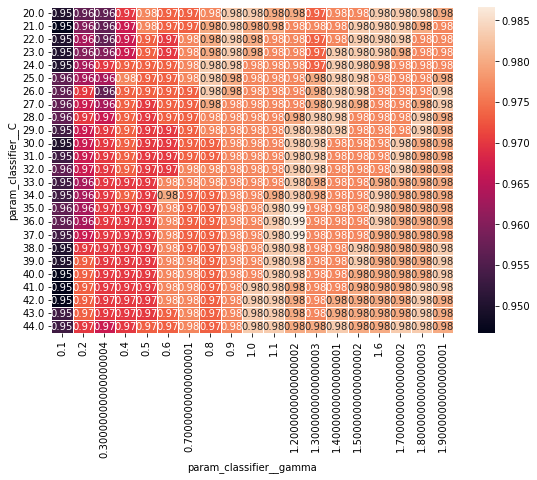

In [7]:
pipe = Pipeline([('preprocessing', StandardScaler()), 
                 ('classifier', svm.SVC())])

C=np.arange(20., 45.)
gamma=np.arange(0.1,2.0, 0.1)


param_grid =[
    {'preprocessing': [StandardScaler()], 
     'classifier': [svm.SVC()],
     'classifier__C': C,
     'classifier__gamma': gamma
     }
]

grid = GridSearchCV(pipe, param_grid, cv=5, return_train_score=True)
grid.fit(X,y)
table=pd.DataFrame(grid.cv_results_)
pv_table=table.pivot_table(index='param_classifier__C',columns='param_classifier__gamma',values='mean_test_score')
pv_table
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(pv_table, annot=True, linewidths=.5, ax=ax)

In [8]:
pv_table.stack().head(10)

param_classifier__C  param_classifier__gamma
20.0                 0.1                        0.950000
                     0.2                        0.956667
                     0.3                        0.956667
                     0.4                        0.970000
                     0.5                        0.976667
                     0.6                        0.973333
                     0.7                        0.973333
                     0.8                        0.976667
                     0.9                        0.983333
                     1.0                        0.983333
dtype: float64

In [9]:
display(pv_table.stack().max())
display(pv_table.stack().idxmax())

0.9866666666666667

(35.0, 1.2000000000000002)

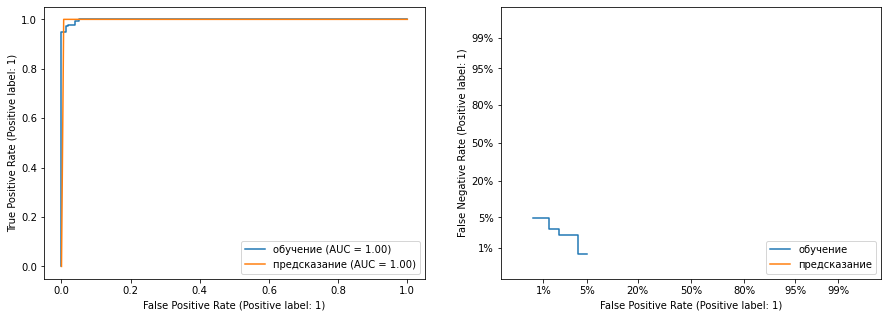

In [22]:
from sklearn.metrics import roc_curve, auc, plot_det_curve, plot_roc_curve
from sklearn.metrics import RocCurveDisplay, DetCurveDisplay, ConfusionMatrixDisplay

cls = make_pipeline( StandardScaler(),svm.SVC(C=35, gamma=1.2) )
cls.fit(X,y)
y_pred = cls.predict(X)

fig, [ax_roc, ax_det] = plt.subplots(1, 2, figsize=(15, 5))
RocCurveDisplay.from_estimator(clf, X, y, ax=ax_roc, name='обучение');
RocCurveDisplay.from_predictions(y, y_pred, ax=ax_roc, name='предсказание');

DetCurveDisplay.from_estimator(clf, X, y, ax=ax_det, name='обучение');
DetCurveDisplay.from_predictions(y, y_pred, ax=ax_det, name='предсказание');

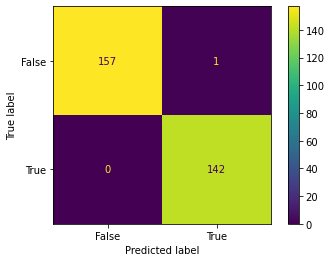

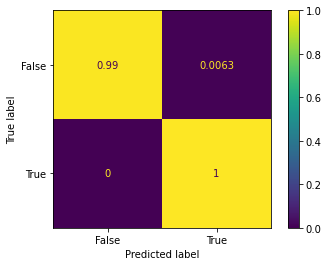

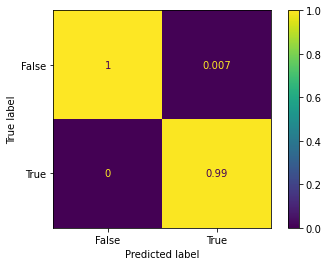

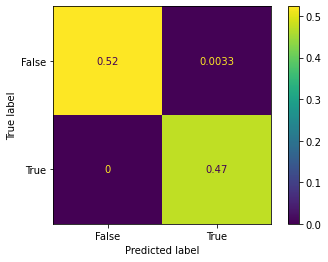

In [31]:
from sklearn.metrics import confusion_matrix
matrix=confusion_matrix(y,y_pred)
ConfusionMatrixDisplay.from_predictions(y, y_pred);
ConfusionMatrixDisplay.from_predictions(y, y_pred, normalize='true');
ConfusionMatrixDisplay.from_predictions(y, y_pred, normalize='pred');
ConfusionMatrixDisplay.from_predictions(y, y_pred, normalize='all');

## Разные ядра - разное деление

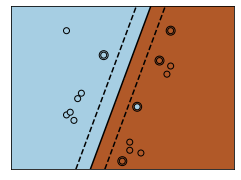

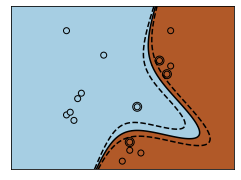

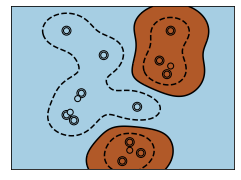

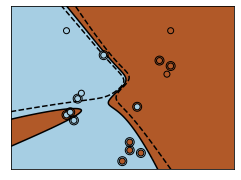

In [67]:
X = np.c_[(.4, -.7),
          (-1.5, -1),
          (-1.4, -.9),
          (-1.3, -1.2),
          (-1.1, -.2),
          (-1.2, -.4),
          (-.5, 1.2),
          (-1.5, 2.1),
          (1, 1),
          # --
          (1.3, .8),
          (1.2, .5),
          (.2, -2),
          (.5, -2.4),
          (.2, -2.3),
          (0, -2.7),
          (1.3, 2.1)].T
Y = [0] * 8 + [1] * 8


fignum = 1


# fit the model
for kernel in ('linear', 'poly', 'rbf','sigmoid'):
    clf = svm.SVC(kernel=kernel, gamma=2)
    clf.fit(X, Y)

    # plot the line, the points, and the nearest vectors to the plane
    plt.figure(fignum, figsize=(4, 3))
    plt.clf()

    plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=80,
                facecolors='none', zorder=10, edgecolors='k')
    plt.scatter(X[:, 0], X[:, 1], c=Y, zorder=10, cmap=plt.cm.Paired,
                edgecolors='k')

    plt.axis('tight')
    x_min = -3
    x_max = 3
    y_min = -3
    y_max = 3

    XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
    Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(XX.shape)
    plt.figure(fignum, figsize=(4, 3))
    plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired, shading='auto')
    plt.contour(XX, YY, Z, colors=['k', 'k', 'k'], linestyles=['--', '-', '--'],
                levels=[-.5, 0, .5])

    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)

    plt.xticks(())
    plt.yticks(())
    fignum = fignum + 1
plt.show()